# Impact of Data Scaling and Penalty on SGDRegressor

## Importing Required Packages

In [151]:
#Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

## Reading CSV

In [152]:
#Reading CSV
data = np.genfromtxt('hospitalizations.txt', delimiter=' ')

## Data Pre-Processing

In [153]:
hosp = data[:,1]

In [154]:
first_date = str(data[0][0])
first_date = datetime.strptime(first_date[:4]+"-"+first_date[4:6]+"-"+first_date[6:8],"%Y-%m-%d")

## Exploratory Data Analysis

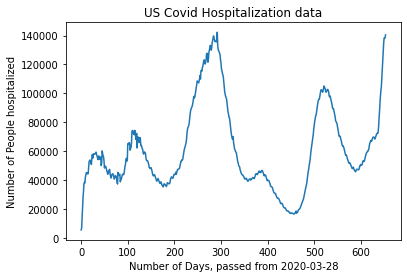

In [155]:
#Plotting Time-Series of Hospitalization
plt.plot(hosp)
plt.xlabel(f"Number of Days, passed from {first_date.date()}")
plt.ylabel("Number of People hospitalized")
plt.title('US Covid Hospitalization data')
plt.show()

## Defining Parameters for the model

In [156]:
#Defining Parameters
last = len(hosp)
win = 20 # input size or window size
m = 50 # data period and number of data points

## Defining Data Structure for storing results

In [157]:
results = {'Model':[],'Penalty':[],'Data Scaled?':[],'Training Error':[],'Testing Error':[],'Future Testing Error':[]}

## SGDRegressor With L2 Regularization and No Data Scaling 

## Storing Static Data in results

In [158]:
results['Model'].append('SGDRegressor')
results['Penalty'].append('L2')
results['Data Scaled?'].append('No')

### Training

#### Defining Training Data

In [159]:
## Defining starting point for the training set
trainbegin = np.random.randint(400)
## Defining and adding an initial training trend (datapoint) to the features and regressor set
Xtrain = np.array(hosp[trainbegin:trainbegin+win])
ytrain = np.array(hosp[trainbegin+win])
## Adding trends equivalent to window size, to the training set
for i in range(1, m):
    Xtrain = np.vstack([Xtrain, hosp[trainbegin+i:trainbegin+i+win]])
    ytrain = np.append(ytrain, hosp[trainbegin+i+win])

#### Training the Model with Time-Series Data

In [160]:
#Applying the model to the training data
lin_reg = SGDRegressor()
lin_reg.fit(Xtrain, ytrain)
ypred = lin_reg.predict(Xtrain)

#### Printing Mean Error on training set

In [161]:
error = np.sqrt(mean_squared_error(ytrain, ypred))
print('Mean Training Error:', error)
results['Training Error'].append(error)

Mean Training Error: 2.0809199048925286e+19


#### Printing Learned Weights

In [162]:
#Printing Weights Learned by the Model
print('Learned Weights by the model:')
print(lin_reg.coef_)

Learned Weights by the model:
[ 1.66218798e+12  9.13020208e+13  1.53792474e+14  7.16415527e+13
  4.91987220e+13  6.49633402e+12 -1.75615091e+13  9.20029385e+12
  6.16512446e+13  9.91500401e+13  7.02884316e+13  6.37088667e+13
 -1.64328075e+13 -5.54158772e+13 -5.20079520e+13 -2.59267609e+13
  3.33985694e+13  2.25394412e+13  2.09699012e+13  7.68782013e+11]


#### Plotting comparison of the Training dataset Trend and Predicted Trend

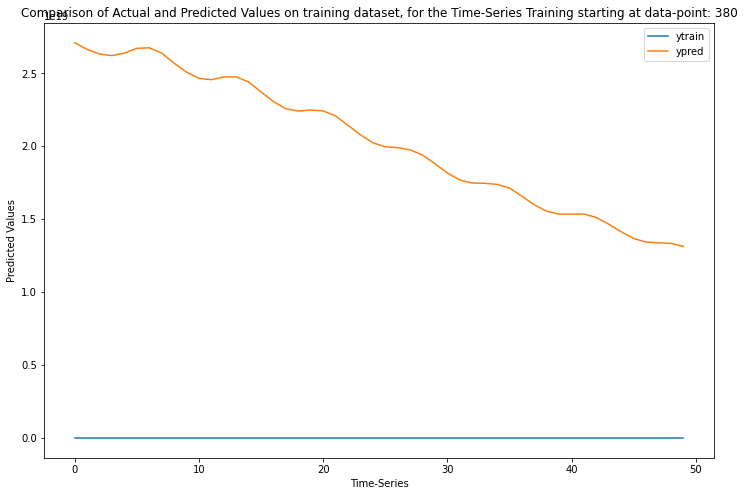

In [163]:
plt.figure(figsize=(12,8))
plt.plot(ytrain)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytrain','ypred'])
plt.title('Comparison of Actual and Predicted Values on training dataset, for the Time-Series Training starting at data-point: ' + str(trainbegin))
plt.show()

### Testing

#### Defining Testing Dataset

In [164]:
## Creating Testing dataset
testbegin = trainbegin + m
## Defining and adding an initial testing trend (datapoint) to the features and regressor set
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
## Adding trends equivalent to window size, to the training set
for i in range(1, 5):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

#### Predicting over Testing Dataset

In [165]:
ypred = lin_reg.predict(Xtest)

#### Printing Mean Error on testing set

In [166]:
#Printing MSE on Testing Dataset
error = np.sqrt(mean_squared_error(ytest, ypred))
print('Test Error, immediately after training: ', error)
results['Testing Error'].append(error)

Test Error, immediately after training:  1.2133516712010994e+19


#### Plotting comparison of the Testing dataset Trend and Predicted Trend

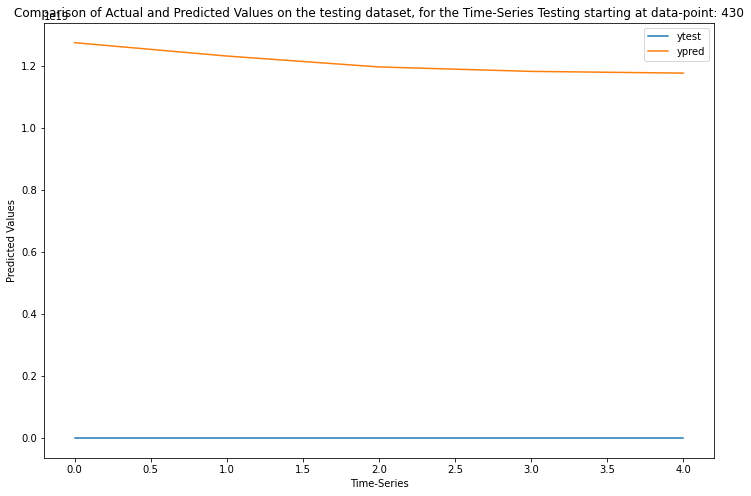

In [167]:
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on the testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

### Future Testing

#### Defining Future Testing Dataset

In [168]:
#Creating Testing dataset for the future predictions
testbegin = np.random.randint(trainbegin + 2 * m, last - win - m)
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
for i in range(1, m):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

#### Predicting over Testing Dataset

In [169]:
ypred = lin_reg.predict(Xtest)

#### Printing Mean Error on future testing set

In [170]:
#Printing MSE on Testing Dataset
error = np.sqrt(mean_squared_error(ytest, ypred))
print('Test error at a random future:', error)
results['Future Testing Error'].append(error)

Test error at a random future: 5.420449213318703e+19


#### Plotting comparison of the Future Testing dataset Trend and Predicted Trend

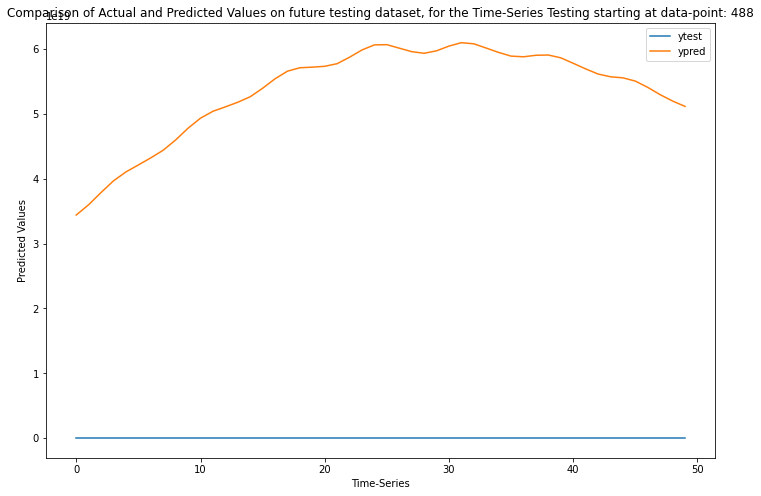

In [171]:
#Plotting comparison of actual and predicted values on the testing dataset
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on future testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

## SGDRegressor With L2 Regularization and Data Scaling 

## Storing Static Data in results

In [172]:
results['Model'].append('SGDRegressor')
results['Penalty'].append('L2')
results['Data Scaled?'].append('Yes')

### Data Scaling

#### Fitting Training Data for Scaling

In [173]:
#Fitting Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)

StandardScaler()

### Training

#### Transforming Training Data using StandardScaler

In [174]:
#Transforming Training Data
Xtrain = scaler.transform(Xtrain)

#### Training the Model with Time-Series Data

In [175]:
#Applying the model to the training data
lin_reg = SGDRegressor()
lin_reg.fit(Xtrain, ytrain)
ypred = lin_reg.predict(Xtrain)

#### Printing Mean Error on training set

In [176]:
error = np.sqrt(mean_squared_error(ytrain, ypred))
print('Mean Training Error:', error)
results['Training Error'].append(error)

Mean Training Error: 530.1416477860026


#### Printing Learned Weights

In [177]:
#Printing Weights Learned by the Model
print('Learned Weights by the model:')
print(lin_reg.coef_)

Learned Weights by the model:
[-177.3470465  -211.71955822 -186.20705812  -32.97902223  170.31889093
  369.36436681  486.98965256  392.32608273  282.78701669  230.85079603
  283.10654857  428.61600705  592.28600388  701.25653761  647.89066682
  552.865639    468.83931337  528.46190106  680.7798554   863.50760332]


#### Plotting comparison of the Training dataset Trend and Predicted Trend

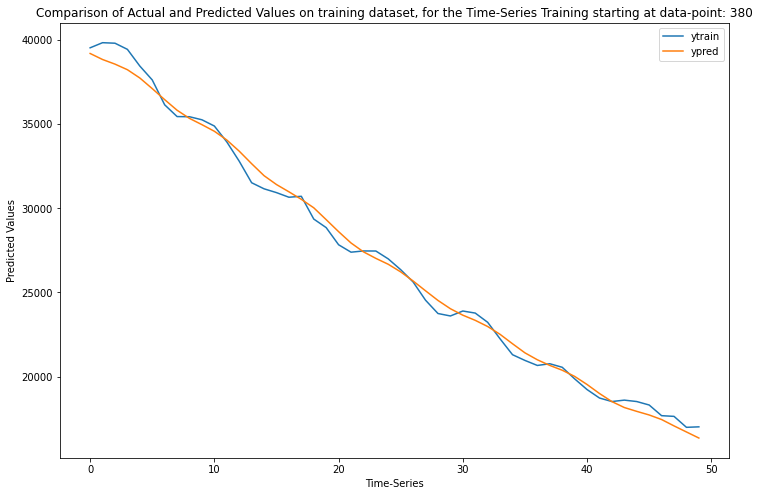

In [178]:
plt.figure(figsize=(12,8))
plt.plot(ytrain)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytrain','ypred'])
plt.title('Comparison of Actual and Predicted Values on training dataset, for the Time-Series Training starting at data-point: ' + str(trainbegin))
plt.show()

### Testing

#### Defining Testing Dataset

In [179]:
## Creating Testing dataset
testbegin = trainbegin + m
## Defining and adding an initial testing trend (datapoint) to the features and regressor set
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
## Adding trends equivalent to window size, to the training set
for i in range(1, 5):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

#### Transforming Testing Data using StandardScaler

In [180]:
#Transforming Training Data
Xtest = scaler.transform(Xtest)

#### Predicting over Testing Dataset

In [181]:
ypred = lin_reg.predict(Xtest)

#### Printing Mean Error on testing set

In [182]:
#Printing MSE on Testing Dataset
error = np.sqrt(mean_squared_error(ytest, ypred))
print('Test Error, immediately after training: ', error)
results['Testing Error'].append(error)

Test Error, immediately after training:  1224.0138167005784


#### Plotting comparison of the Testing dataset Trend and Predicted Trend

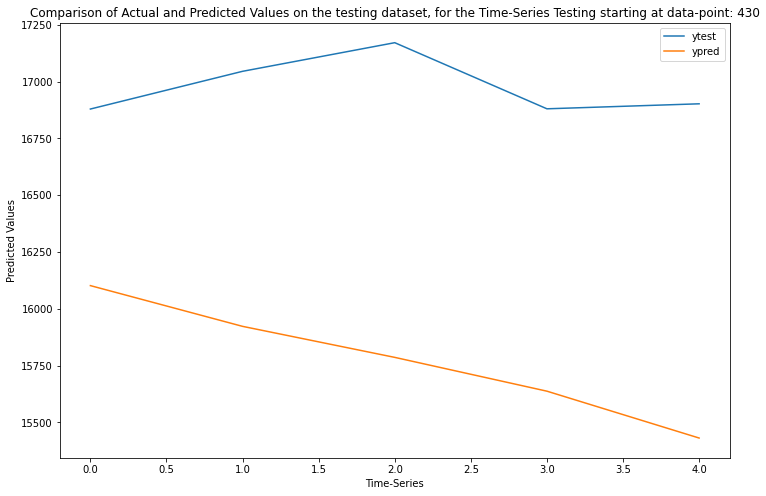

In [183]:
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on the testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

### Future Testing

#### Defining Future Testing Dataset

In [184]:
#Creating Testing dataset for the future predictions
testbegin = np.random.randint(trainbegin + 2 * m, last - win - m)
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
for i in range(1, m):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

#### Transforming Future Testing Data using StandardScaler

In [185]:
#Transforming Training Data
Xtest = scaler.transform(Xtest)

#### Predicting over Testing Dataset

In [186]:
ypred = lin_reg.predict(Xtest)

#### Printing Mean Error on future testing set

In [187]:
error = np.sqrt(mean_squared_error(ytest, ypred))
print('Test Error at a random future:', error)
results['Future Testing Error'].append(error)

Test Error at a random future: 16605.716344715922


#### Plotting comparison of the Future Testing dataset Trend and Predicted Trend

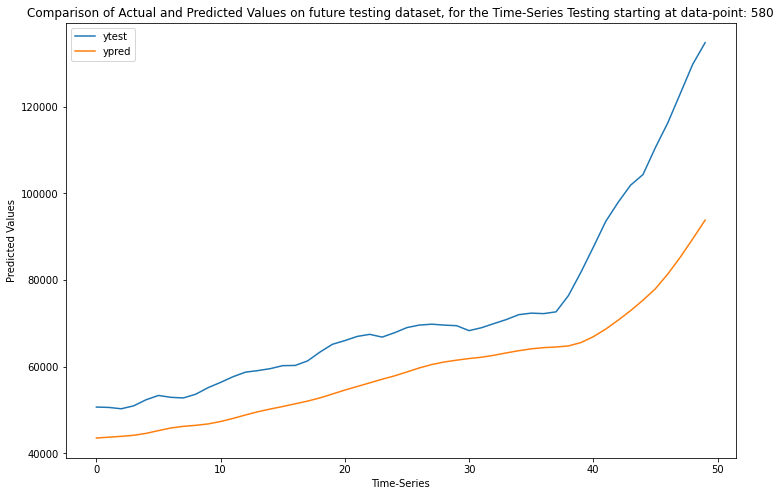

In [188]:
#Plotting comparison of actual and predicted values on the testing dataset
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on future testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

## SGDRegressor With No Regularization and Data Scaling 

## Storing Static Data in results

In [189]:
results['Model'].append('SGDRegressor')
results['Penalty'].append('None')
results['Data Scaled?'].append('Yes')

### Training

#### Training the Model with Time-Series Data

In [190]:
#Applying the model to the training data
lin_reg = SGDRegressor(penalty=None)
lin_reg.fit(Xtrain, ytrain)
ypred = lin_reg.predict(Xtrain)

#### Printing Mean Error on training set

In [191]:
error = np.sqrt(mean_squared_error(ytrain, ypred))
print('Mean Training Error:', error)
results['Training Error'].append(error)

Mean Training Error: 328.1497212640458


#### Printing Learned Weights

In [192]:
#Printing Weights Learned by the Model
print('Learned Weights by the model:')
print(lin_reg.coef_)

Learned Weights by the model:
[-420.38228023 -571.94192091 -653.26052187 -501.09255156  -64.77710863
  400.46996795  706.2411572   622.38490451  355.60081241  104.5718623
   53.51070049  316.98547601  730.01108592 1040.80264887 1016.93953106
  782.53004444  541.48089859  513.67357086  832.08508444 1279.12322913]


#### Plotting comparison of the Training dataset Trend and Predicted Trend

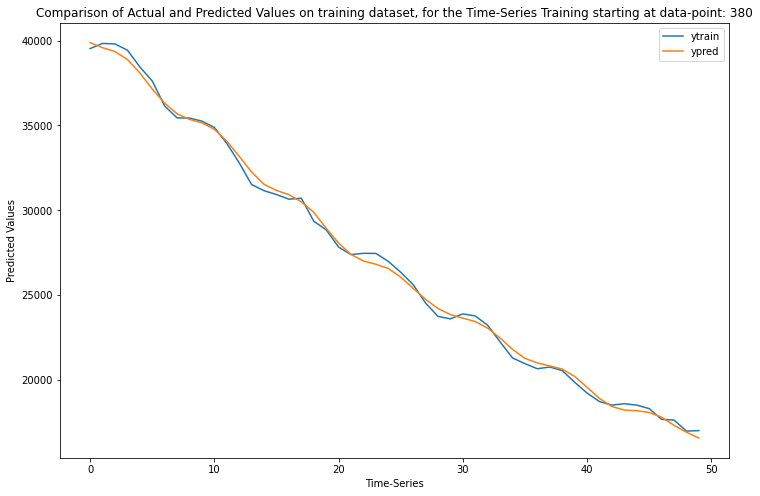

In [193]:
plt.figure(figsize=(12,8))
plt.plot(ytrain)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytrain','ypred'])
plt.title('Comparison of Actual and Predicted Values on training dataset, for the Time-Series Training starting at data-point: ' + str(trainbegin))
plt.show()

### Testing

#### Defining Testing Dataset

In [194]:
## Creating Testing dataset
testbegin = trainbegin + m
## Defining and adding an initial testing trend (datapoint) to the features and regressor set
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
## Adding trends equivalent to window size, to the training set
for i in range(1, 5):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

#### Transforming Testing Data using StandardScaler

In [195]:
#Transforming Training Data
Xtest = scaler.transform(Xtest)

#### Predicting over Testing Dataset

In [196]:
ypred = lin_reg.predict(Xtest)

#### Printing Mean Error on testing set

In [197]:
#Printing MSE on Testing Dataset
error = np.sqrt(mean_squared_error(ytest, ypred))
print('Test Error, immediately after training: ', error)
results['Testing Error'].append(error)

Test Error, immediately after training:  698.4936532536046


#### Plotting comparison of the Testing dataset Trend and Predicted Trend

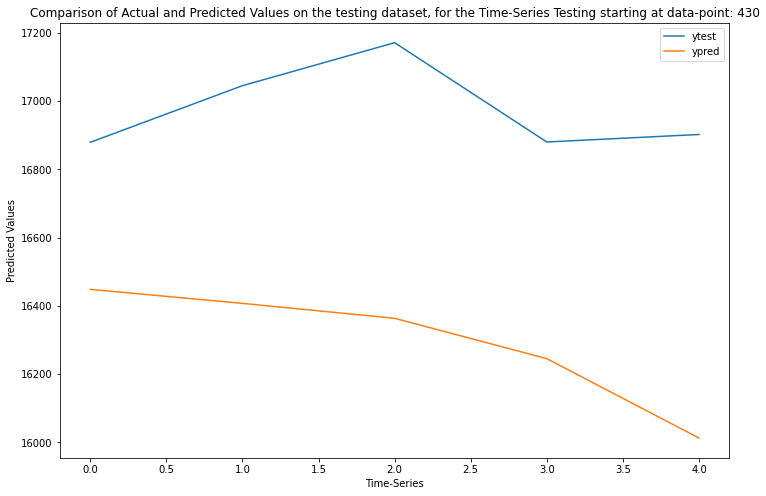

In [198]:
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on the testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

### Future Testing

#### Defining Future Testing Dataset

In [199]:
#Creating Testing dataset for the future predictions
testbegin = np.random.randint(trainbegin + 2 * m, last - win - m)
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
for i in range(1, m):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

#### Transforming Future Testing Data using StandardScaler

In [200]:
#Transforming Training Data
Xtest = scaler.transform(Xtest)

#### Predicting over Testing Dataset

In [201]:
ypred = lin_reg.predict(Xtest)

#### Printing Mean Error on future testing set

In [202]:
error = np.sqrt(mean_squared_error(ytest, ypred))
print('Test Error at a random future:', error)
results['Future Testing Error'].append(error)

Test Error at a random future: 2238.4724747098744


#### Plotting comparison of the Future Testing dataset Trend and Predicted Trend

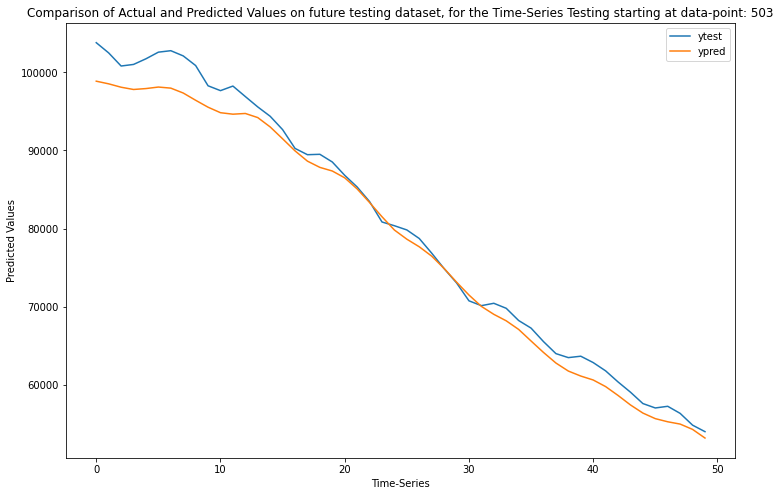

In [203]:
#Plotting comparison of actual and predicted values on the testing dataset
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on future testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

## SGDRegressor With L1 Regularization and Data Scaling 

## Storing Static Data in results

In [204]:
results['Model'].append('SGDRegressor')
results['Penalty'].append('L1')
results['Data Scaled?'].append('Yes')

### Training

#### Training the Model with Time-Series Data

In [205]:
#Applying the model to the training data
lin_reg = SGDRegressor(penalty='l1')
lin_reg.fit(Xtrain, ytrain)
ypred = lin_reg.predict(Xtrain)

#### Printing Mean Error on training set

In [206]:
error = np.sqrt(mean_squared_error(ytrain, ypred))
print('Mean Training Error:', error)
results['Training Error'].append(error)

Mean Training Error: 332.79007452400185


#### Printing Learned Weights

In [207]:
#Printing Weights Learned by the Model
print('Learned Weights by the model:')
print(lin_reg.coef_)

Learned Weights by the model:
[-414.57279632 -535.29860259 -645.96332264 -480.23536479  -76.36432251
  380.53614688  658.11842682  576.60649887  347.99045689   91.85822567
   63.51761553  334.98509193  722.31363752 1011.70742891 1003.9335542
  792.39661347  544.88887498  541.60062573  859.90375294 1304.17225167]


#### Plotting comparison of the Training dataset Trend and Predicted Trend

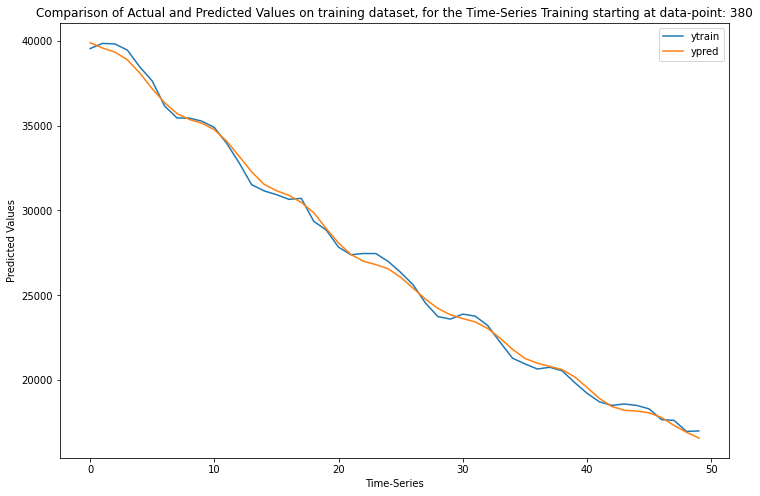

In [208]:
plt.figure(figsize=(12,8))
plt.plot(ytrain)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytrain','ypred'])
plt.title('Comparison of Actual and Predicted Values on training dataset, for the Time-Series Training starting at data-point: ' + str(trainbegin))
plt.show()

### Testing

#### Defining Testing Dataset

In [209]:
## Creating Testing dataset
testbegin = trainbegin + m
## Defining and adding an initial testing trend (datapoint) to the features and regressor set
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
## Adding trends equivalent to window size, to the training set
for i in range(1, 5):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

#### Transforming Testing Data using StandardScaler

In [210]:
#Transforming Training Data
Xtest = scaler.transform(Xtest)

#### Predicting over Testing Dataset

In [211]:
ypred = lin_reg.predict(Xtest)

#### Printing Mean Error on testing set

In [212]:
#Printing MSE on Testing Dataset
error = np.sqrt(mean_squared_error(ytest, ypred))
print('Test Error, immediately after training: ', error)
results['Testing Error'].append(error)

Test Error, immediately after training:  685.0728495389795


#### Plotting comparison of the Testing dataset Trend and Predicted Trend

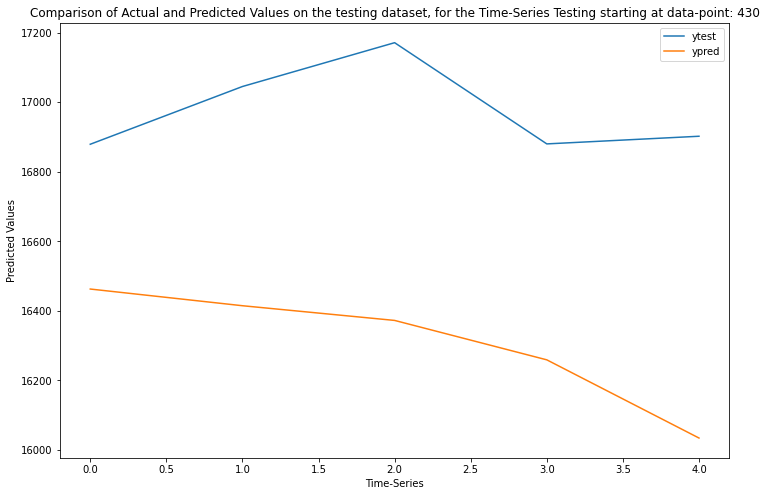

In [213]:
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on the testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

### Future Testing

#### Defining Future Testing Dataset

In [214]:
#Creating Testing dataset for the future predictions
testbegin = np.random.randint(trainbegin + 2 * m, last - win - m)
Xtest = np.array(hosp[testbegin:testbegin+win])
ytest = np.array(hosp[testbegin+win])
for i in range(1, m):
    Xtest = np.vstack([Xtest, hosp[testbegin+i:testbegin+i+win]])
    ytest = np.append(ytest, hosp[testbegin+i+win])

#### Transforming Future Testing Data using StandardScaler

In [215]:
#Transforming Training Data
Xtest = scaler.transform(Xtest)

#### Predicting over Testing Dataset

In [216]:
ypred = lin_reg.predict(Xtest)

#### Printing Mean Error on future testing set

In [217]:
error = np.sqrt(mean_squared_error(ytest, ypred))
print('test error at a random future:', error)
results['Future Testing Error'].append(error)

test error at a random future: 1509.0453823960086


#### Plotting comparison of the Future Testing dataset Trend and Predicted Trend

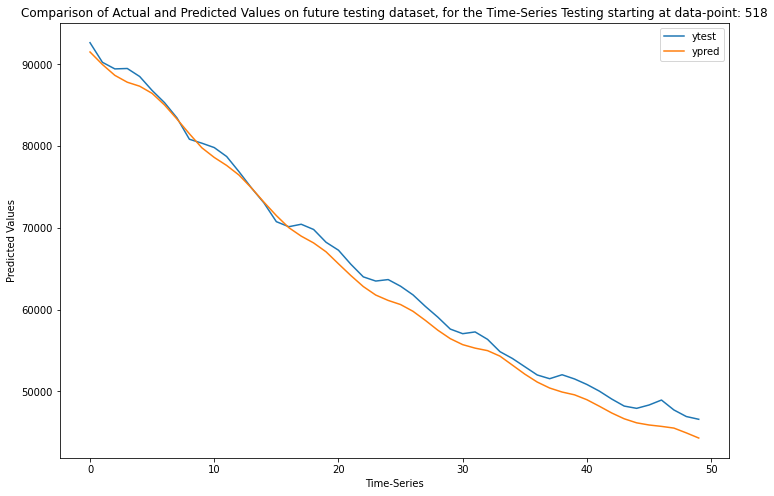

In [218]:
#Plotting comparison of actual and predicted values on the testing dataset
plt.figure(figsize=(12,8))
plt.plot(ytest)
plt.plot(ypred)
plt.xlabel("Time-Series")
plt.ylabel("Predicted Values")
plt.legend(['ytest','ypred'])
plt.title('Comparison of Actual and Predicted Values on future testing dataset, for the Time-Series Testing starting at data-point: ' + str(testbegin))
plt.show()

## Printing Cumulative Results

In [219]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(['Testing Error'],ascending=True)
results_df

,Model,Penalty,Data Scaled?,Training Error,Testing Error,Future Testing Error
3,SGDRegressor,L1,Yes,3.327901e+02,6.850728e+02,1.509045e+03
2,SGDRegressor,None,Yes,3.281497e+02,6.984937e+02,2.238472e+03
1,SGDRegressor,L2,Yes,5.301416e+02,1.224014e+03,1.660572e+04
0,SGDRegressor,L2,No,2.080920e+19,1.213352e+19,5.420449e+19


In [224]:
print("The Best Model with the least error combination is:\n",results_df.iloc[0])

The Best Model with the least error combination is:
 Model                   SGDRegressor
Penalty                           L1
Data Scaled?                     Yes
Training Error            332.790075
Testing Error              685.07285
Future Testing Error     1509.045382
Name: 3, dtype: object
